# VT1

This is the Script for the VT1 which shall fullfill the following tasks:


## Import of Packages

In [52]:
# Import of Packages
# import math
import numpy as np
import pandas as pd

# import matplotlib.pyplot as plt
# import random

# Importing the Functions File
import Functions as fn

# Import of Excel Data
(General Format of Excel must be Headers followed by columns of Data)

In [53]:
# Reading the excel file and set it as a Dataframe
df = pd.read_excel("Sample.xlsx")

## Creating Scenarios
Calculation of Driftrate Mu and Standart Deviation Sigma


In [54]:
# Assign Variables with a specific Vector of the Dataframe
Year = np.array(df.iloc[:, 0])
Historic_Demand = np.array(df.iloc[:, 1])
Annual_Change = np.array(df.iloc[:, 2])
Percentage_Change = np.array(df.iloc[:, 3])
Outliner = np.array(df.iloc[:, 4])
# Percentage Change excluding the Outliners
Percentage_Change1 = np.array(df.iloc[:, 5])

# Caluclation of the Estimated Percentage Drift Rate Mu:
mu = np.nanmean(Percentage_Change1)
print("Mu = ", mu)
# Caluclation of the Estimated Percentage Standart Deviation Sigma:
sigma = np.nanstd(Percentage_Change1)
print("Simga = ", sigma)

Mu =  0.042754330256447565
Simga =  0.05813761525452841


Creating a Defined Number of Forecasts and Plotting them

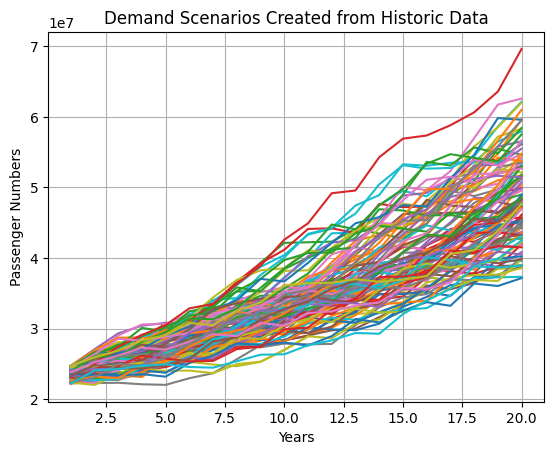

<Figure size 640x480 with 0 Axes>

In [55]:
# Demand at t0
# Dt0 = 22561132
Dt0 = Historic_Demand[-1]
# Steptime [Years]
dt = 1
# Time Horizon of Forecasts in Steptime
Fth = 20
# Number of Forecasts
Forecasts = 100

# Calling the Scenario Creation Function
Scenario = fn.Scenario_creation(mu, sigma, Dt0, dt, Fth, Forecasts)

# Calling the Scenario Plotting Function
fn.Scenario_plot(Scenario, Fth, "Demand Scenarios Created from Historic Data")

## Calculation of the Traditional NPV and ENPV


Inputs for NPV Calculation

In [56]:
th = 1000000  # Throughput Capacity per Unit of Capacity
r_D = 0.03  # Revenues per Unit of Demand per Period
r_K = 0.03  # Revenues per Unit of Capacity per Period
r_K_rent = 0.03  # Rental Revenues per Unit of Capacity per Period
co_K = 0.01  # Operational costs per unit of capacity per period
co_D = 0.004  # Operational cost per unit of demand per period
ci_K = 10  # Installation cost per unit of capacity
discount = 0.05  # Discount factor
EoS = 0.85  # EoS factor

# Assinging the Scenario as Demand
D = Scenario
# Rounding the Demand for further Calculations
D_rounded = np.ceil(D / 1000000)

Exporting Data (Mainly used for Programming and Cross Checking with Excel)

In [57]:
# Add initial Value for the Export
df_export = np.hstack((Dt0 * np.ones((D.shape[0], 1)), D))
# Change the shape to an Pandas Data Frame
df_export_2 = pd.DataFrame(df_export)
# Define Export File Name (if not found in Files a new one is created)
excel_file = "output.xlsx"
# Fill the Data Frame into the Excel File
df_export_2.to_excel(excel_file, index=False)

Creation of a mean Capacity Estimation

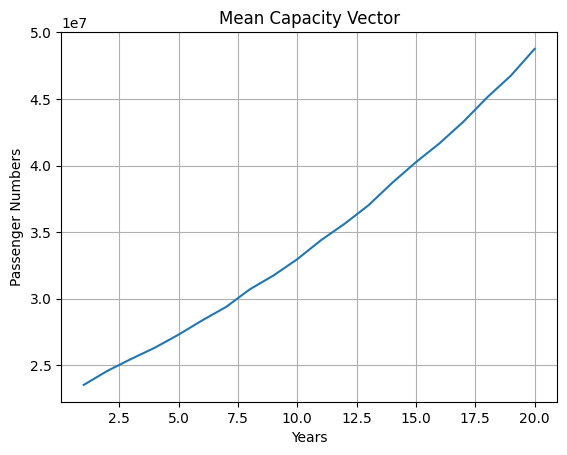

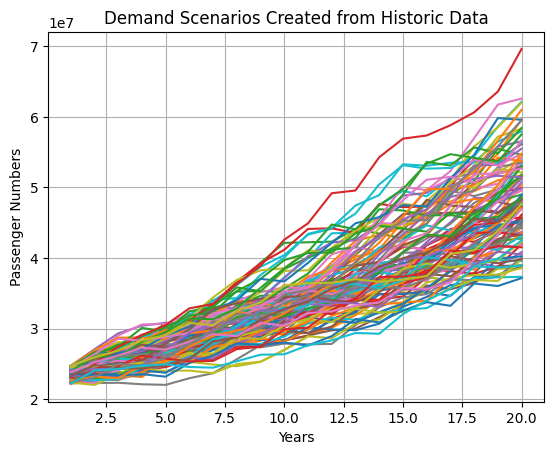

<Figure size 640x480 with 0 Axes>

In [58]:
# Calculating a Mean Scenario for the Estimation of the Capacity Vector
capacity_vector = np.mean(Scenario, axis=0)

# Plotting the Mean Sceanrio as Capacity Vector
fn.Scenario_plot(capacity_vector, Fth, "Mean Capacity Vector")
# Plotting the Demand (For Visual Comparison with the Mean Capacity Vector)
fn.Scenario_plot(Scenario, Fth, "Demand Scenarios Created from Historic Data")

Creation of a Staircase Vector based on the Capacity Estimation

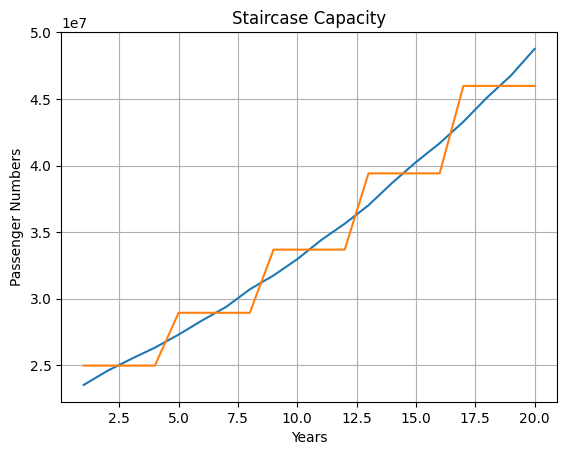

<Figure size 640x480 with 0 Axes>

In [59]:
# Number of Capacity Changes
num_steps = 5
# Qunatify the nonlinear Capacity Vector into a Step Vector
bin_size = len(capacity_vector) // num_steps
staircase_vector = np.zeros(len(capacity_vector))
for i in range(num_steps):
    start_idx = i * bin_size
    end_idx = (i + 1) * bin_size
    if i == num_steps - 1:
        end_idx = len(capacity_vector)
    avg_value = np.mean(capacity_vector[start_idx:end_idx])
    staircase_vector[start_idx:end_idx] = avg_value

# Estiamted Capacity Vector
K_est = staircase_vector
# Rounding the Estiamted Capacity Vector for further Calculations
K_est_rounded = np.ceil(K_est / 1000000)
# Combining the Mean Capacity Vector and the Staircase Capacity Vector for Plotting
Capacity_plot = np.array([capacity_vector, staircase_vector])
# Plotting the Combined Vector for Visual Inspection
fn.Scenario_plot(Capacity_plot, Fth, "Staircase Capacity")

Calling the NPV Calculation Function for Comparsion with the Excel Sheet

In [60]:
# Defined Capacity Vector in the Excel Sheet -> To compare results
K_excel_rounded = np.array(
    [25, 25, 25, 25, 30, 30, 30, 30, 30, 40, 40, 40, 40, 40, 50, 50, 50, 50, 50, 50]
)

# Calling the NPV Calculatio Function to compare with Excel
NPV_excel = fn.NPV_Calculation(D_rounded, K_excel_rounded, Fth, dt)
print("Traditional NPVs = ", NPV_excel)

Traditional NPVs =  [10048944.73668528  8545379.78633814 11710894.02205942 10007027.59708638
  8424176.51872485  9332673.56359264 11414405.34544765 10252661.56268173
 10430044.39604193 12544550.21391987  9406654.9615551  11170161.1619482
  9327692.21832529  9794233.19946803  9281014.4843788   9423760.95267564
  8866769.0125776  10096299.64114798  8327046.43575532 11792523.02912778
  9440063.38291665 10629118.10988037 10417426.0430454   7670998.33883241
  9571880.90208876 10754763.03581153 11110293.50646566  8074550.9710307
  7112835.35578836 10321864.95785791  8750827.70994874 11008096.23700999
  9959868.63447466  9632996.76944732  9295079.98653577  8122385.1597024
 10774745.89770312  8733644.20435946 11259540.38227713 10383509.05267897
  8117852.9803595   8398226.60643527  9583606.2641276  12176273.04380487
 10050302.65624068 10682161.87136607 10640523.70897616 10533379.29099877
 11671625.14163688 12444658.21600626  9347598.82011639 11082059.60047286
 11737796.40752483  8350653.551160

Calculating the ENPV for Comparsion with the Excel Sheet

In [61]:
# Calculating the ENPV for the Excel Capacity Vector
ENPV_excel = np.mean(NPV_excel)
print("Traditional ENPV = ", ENPV_excel)

Traditional ENPV =  9668520.518928615


Calling the NPV Calculation Function for the Estimated Staircase Capacity Vector

In [62]:
# Calling the NPV Calculatio Function
NPV_est = fn.NPV_Calculation(D_rounded, K_est_rounded, Fth, dt)
print("Traditional NPVs = ", NPV_est)

Traditional NPVs =  [10686450.34804333  9291108.03948414 11904142.36022941 10633940.24502151
  9246341.94888668 10071751.99367804 11637764.30676623 10570035.85118498
 10933789.27244507 12544562.06172578 10194854.22683216 11448938.76454724
 10039843.89219244 10501687.36799576  9909332.6783884  10060282.73576492
  9637983.71707494 10704038.24010043  9129873.55975408 11866618.95096779
 10167467.03393714 10946120.32368352 10987237.14918526  8462518.75573162
 10303253.18152089 11198102.35489293 11442785.96700976  8798578.90282503
  7915662.47978712 10888882.31143371  9533349.61247629 11374523.63463643
 10627139.05421627 10325576.24619134  9963039.75815448  8925212.28370116
 11241407.39281043  9503061.01644708 11489712.57573344 10949582.4924481
  8917731.0126684   9180748.50896281 10359563.41412942 12232632.72151115
 10739351.23238364 11064778.40205066 11222679.36384002 10979081.59473901
 11820977.66609523 12444670.06381218 10152092.17901449 11421686.77795945
 11929876.79334976  9133175.4536

Calculating the ENPV for the Estimated Staircase Capacity Vector

In [63]:
# Calculating the ENPV for Staircase Capacity Vector
ENPV_est = np.mean(NPV_est)
print("Traditional ENPV = ", ENPV_est)

Traditional ENPV =  10238505.185123675


## Creating a Flexible Capacity Vector

In [64]:
# Initial Capacity
# K0 = 25
K0 = K_est_rounded[0]

# Capacity Increase in the Excel Sheet
deltaK_Flex_excel = 5
# Calling the Decision Rule for Excel Function to Create a Flexible Capacity Vector
Flexible_Capacity_Excel = fn.Decision_Rule_Excel(D_rounded, K0, deltaK_Flex_excel)

In [65]:
# Capacity Increase Vector for Comparison and Increase of Capacity
deltaK_Flex = [5, 8, 10]
# Calling the Decision Rule Function to Create a Flexible Capacity Vector
Flexible_Capacity = fn.Decision_Rule(D_rounded, K0, deltaK_Flex)

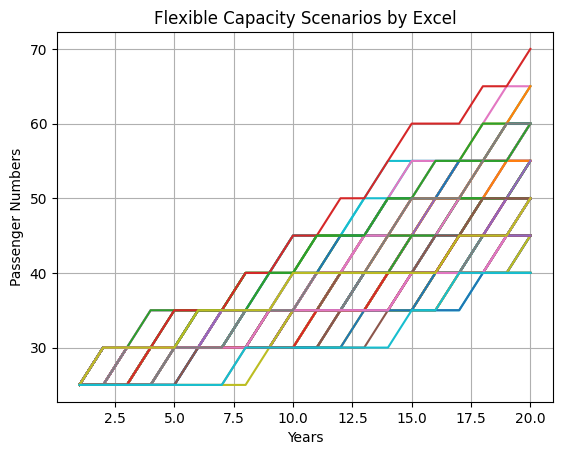

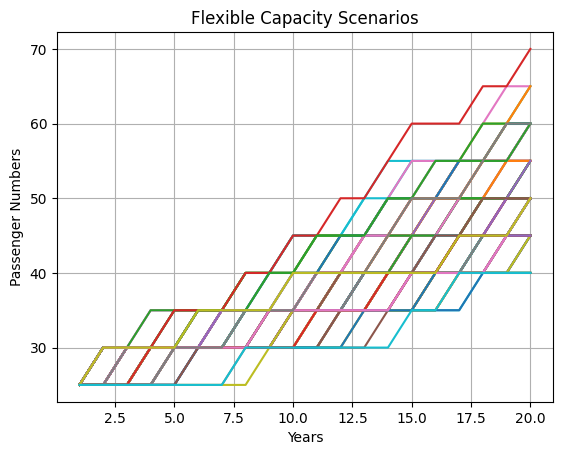

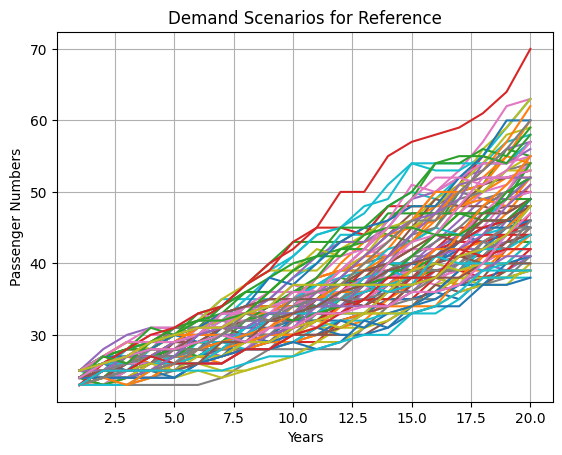

<Figure size 640x480 with 0 Axes>

In [66]:
# Plotting the Flexible Capacity Vectors
fn.Scenario_plot(Flexible_Capacity_Excel, Fth, "Flexible Capacity Scenarios by Excel")
fn.Scenario_plot(Flexible_Capacity, Fth, "Flexible Capacity Scenarios")
# Plotting the Demand (For Visual Comparison with the Flexible Capacity Vector)
fn.Scenario_plot(D_rounded, Fth, "Demand Scenarios for Reference")

## Calculation of NPV and ENPV using the Flexible Capacity Vector

In [67]:
# Calling the Flexible NPV Calculation Function
Flex_NPV_excel = fn.Flex_NPV_Calculation(D_rounded, Flexible_Capacity_Excel, Fth, dt)
print("Flexible Excel NPVs = ", Flex_NPV_excel)

# Calculating the ENPV for the Flexible Excel Capacity Vector
Flex_ENPV_excel = np.average(Flex_NPV_excel)
print("Flexible Excel ENPV = ", Flex_ENPV_excel)

Flexible Excel NPVs =  [10094395.34520159  9252513.27212587 11331524.84975516 10079970.73451391
  9402241.46013845  9764717.40020627 10885398.10267095 10264334.83815012
 10326040.58676619 11946507.21574536  9897252.22771459 10694455.10214914
  9728174.19758774 10048129.75586583  9733336.22552431  9650234.59818766
  9486023.59759048 10271306.76785901  9085524.93513069 11506269.80518455
  9785551.88112818 10579239.83249669 10229986.2197699   8927970.47867523
  9976650.17659954 10431839.90304036 10735345.82662762  8942573.41246727
  8552508.64442671 10244712.42523892  9429158.02870896 10627793.09096289
 10290116.18685799  9796217.63584637  9642043.50321989  8904528.69360196
 10608557.87315395  9405571.9348617  10879270.06270184 10512827.55744321
  9054488.23139111  9439796.74513296 10083121.85756824 11630757.48474672
 10247829.41589138 10447913.7012544  10480986.96442559 10279765.49563749
 11088293.12404755 12024552.45392171  9786670.82188965 10741388.71885751
 10931898.18037913  9203684.

In [68]:
# Calling the Flexible NPV Calculation Function
Flex_NPV_est = fn.Flex_NPV_Calculation(D_rounded, Flexible_Capacity, Fth, dt)
print("Estimated Flexible Excel NPVs = ", Flex_NPV_est)

# Calculating the ENPV for the Estimated Flexible Capacity Vector
Flex_ENPV_est = np.average(Flex_NPV_est)
print("Estimated Flexible ENPV = ", Flex_ENPV_est)

Estimated Flexible Excel NPVs =  [10094395.34520159  9252513.27212587 11331524.84975516 10079970.73451391
  9402241.46013845  9764717.40020627 10885398.10267095 10264334.83815012
 10326040.58676619 11946507.21574536  9897252.22771459 10694455.10214914
  9728174.19758774 10048129.75586583  9733336.22552431  9650234.59818766
  9486023.59759048 10271306.76785901  9085524.93513069 11506269.80518455
  9785551.88112818 10579239.83249669 10229986.2197699   8927970.47867523
  9976650.17659954 10431839.90304036 10735345.82662762  8942573.41246727
  8552508.64442671 10244712.42523892  9429158.02870896 10627793.09096289
 10290116.18685799  9796217.63584637  9642043.50321989  8904528.69360196
 10608557.87315395  9405571.9348617  10879270.06270184 10512827.55744321
  9054488.23139111  9439796.74513296 10083121.85756824 11630757.48474672
 10247829.41589138 10447913.7012544  10480986.96442559 10279765.49563749
 11088293.12404755 12024552.45392171  9786670.82188965 10741388.71885751
 10931898.18037913

Calculating the new ENPV

In [69]:
print("Excel ENPV = ", ENPV_excel)
print("Traditional ENPV = ", ENPV_est)
print("Flexible ENPV with Excel = ", Flex_ENPV_excel)
print("Flexible ENPV = ", Flex_ENPV_est)
print("If > 0 => Flexible Excel better -> ", Flex_ENPV_excel / ENPV_excel)
print("If > 0 => Flexible better -> ", Flex_ENPV_est / ENPV_est)

Excel ENPV =  9668520.518928615
Traditional ENPV =  10238505.185123675
Flexible ENPV with Excel =  9989938.005656576
Flexible ENPV =  9989938.005656576
If > 0 => Flexible Excel better ->  1.0332437094277975
If > 0 => Flexible better ->  0.9757223173722409


## Plotting Historic Data (For Reference Only)
Plotting Excel Data (Specific to Sample Excel, all other Inputs need to be adjusted to it)

In [70]:
# # Plotting Excel Data (only specific to Test Excel, keys needs to be changed for other
# # data)

# plt.plot(
#     Year,
#     Historic_Demand,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Demand for Zurich Airport")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Annual_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Change of Passenger Demand")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Percentage_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Percentage Change of Passenger Demand")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Percentage_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Change of Passenger Demand Excluding Outlayers")
# plt.legend()  # Display legend
# plt.figure()